In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('movies_initial.csv')

In [72]:
#IMDB puanı en yüksek filmler ile ilgili bilgiler
top_films = df.sort_values(by='imdbRating', ascending=False).head(10)
print(top_films[['title', 'imdbRating', 'director', 'language', 'awards', 'country', 'year', 'runtime']])

                                            title  imdbRating  \
20963                            Band of Brothers         9.6   
29859                                Planet Earth         9.5   
12376                   Dances Sacred and Profane         9.5   
22854                             The Chaos Class         9.5   
45443  The Third Annual 'On Cinema' Oscar Special         9.5   
44235   A Brave Heart: The Lizzie Velasquez Story         9.4   
22638                               The Civil War         9.4   
45998                                Thani Oruvan         9.4   
14588                               The Civil War         9.4   
43875                            Drag Becomes Him         9.4   

                  director                                    language  \
20963                  NaN  English, Dutch, French, German, Lithuanian   
29859                  NaN                                     English   
12376  Dan Jury, Mark Jury                                    

In [73]:
#En popüler dil, tema ve en çok film yapılan ülkeler
dil = df['language'].value_counts().head(7)
ülke = df['country'].value_counts().head(7)
tema = df['genre'].str.split(',').explode().str.strip().value_counts().head(7)

print(dil, ülke, tema)

language
English             25325
French               1784
Italian              1480
Japanese             1290
Spanish               875
Russian               777
English, Spanish      728
Name: count, dtype: int64 country
USA       20589
UK         2550
France     1683
Japan      1468
Italy      1208
Canada      956
India       913
Name: count, dtype: int64 genre
Drama       21993
Comedy      14045
Romance      6176
Action       5917
Thriller     5576
Crime        5454
Horror       4493
Name: count, dtype: int64


director
Ertem Egilmez        8.630000
Rocco Urbisci        8.430000
Igor Maslennikov     8.250000
Christopher Nolan    8.220000
Don Hertzfeldt       8.216667
Andrei Tarkovsky     8.100000
Nick Park            8.066667
Majid Majidi         8.066667
Hayao Miyazaki       8.020000
Satyajit Ray         7.987500
Name: imdbRating, dtype: float64


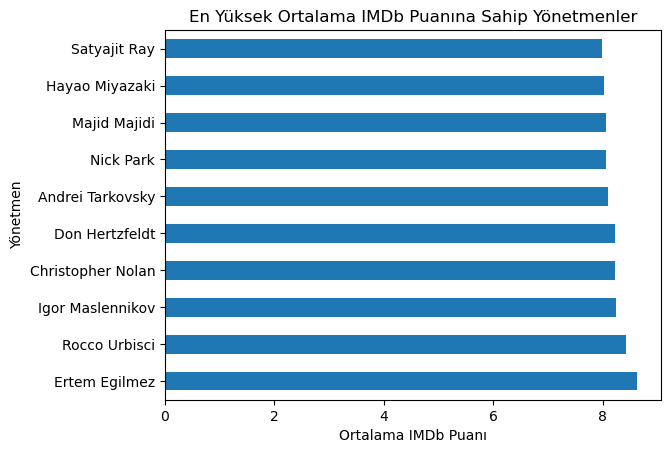

In [74]:
#En az 5 filmi olan, en yüksek ortalama IMDB puanına sahip 10 yönetmen
director_counts = df['director'].value_counts()
top_directors = director_counts[director_counts > 5].index
director_scores = df[df['director'].isin(top_directors)].groupby('director')['imdbRating'].mean().sort_values(ascending=False).head(10)
print(director_scores)
director_scores.head(10).plot(kind='barh')
plt.title('En Yüksek Ortalama IMDb Puanına Sahip Yönetmenler')
plt.xlabel('Ortalama IMDb Puanı')
plt.ylabel('Yönetmen')
plt.show()

In [75]:
#Diller bazında en az 200 filmi olup en yüksek ortalama IMDB puanına sahip 10 dil
df['language'] = df['language'].fillna('Unknown')
df = df.assign(language=df['language'].str.split(',')).explode('language') 
df['language'] = df['language'].str.strip()

language_counts = df['language'].value_counts()
valid_languages = language_counts[language_counts > 200].index

df_filtered = df[df['language'].isin(valid_languages)]
dil_ratings = df_filtered.groupby('language')['imdbRating'].mean().sort_values(ascending=False).head(10)
print(dil_ratings)

language
Turkish       7.060967
Latin         6.966518
Arabic        6.917967
Japanese      6.896373
Russian       6.867282
Hebrew        6.860949
Polish        6.804750
Portuguese    6.802459
Greek         6.799580
German        6.753203
Name: imdbRating, dtype: float64


                 mean  count
genre_list                  
Documentary  7.278229   5296
News         7.200952    105
History      7.112430   2325
Biography    7.055309   2656
War          6.986588   2274
Film-Noir    6.985468    523
Short        6.948114   1538
Music        6.909003   1766
Animation    6.871447   2357
Drama        6.689099  29227


C:\Users\mkalb\AppData\Local\Temp\ipykernel_7892\91531438.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_mean.index, y=genre_mean['mean'], palette='viridis')


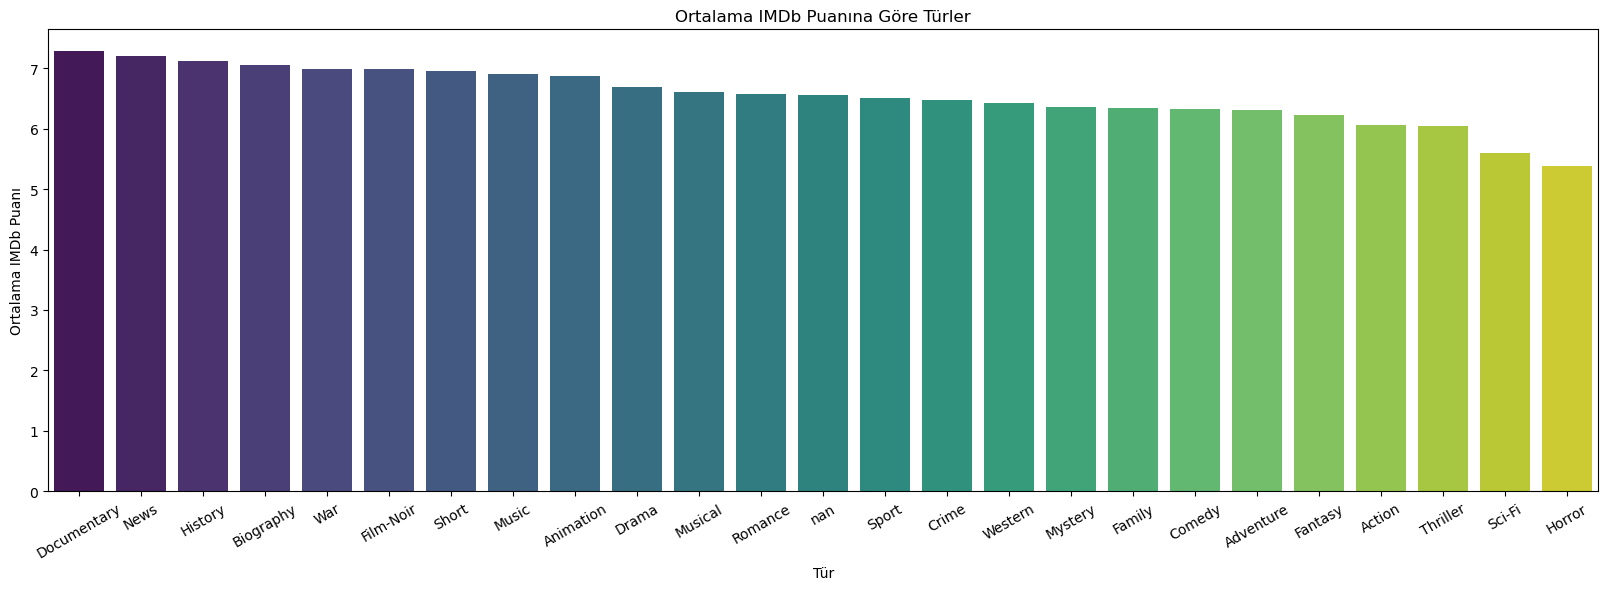

In [76]:
#Ortalama IMDB puanına göre türler
df["genre_list"] = df["genre"].astype(str).str.split(",")   
df_exploded = df.explode("genre_list")                     
df_exploded["genre_list"] = df_exploded["genre_list"].str.strip() 

genre_mean = df_exploded.groupby('genre_list')['imdbRating'].agg(['mean', 'count'])

genre_mean = genre_mean[genre_mean['count'] >= 50].sort_values('mean', ascending=False)
print(genre_mean.head(10))

plt.figure(figsize=(20, 6))
sns.barplot(x=genre_mean.index, y=genre_mean['mean'], palette='viridis')
plt.xticks(rotation=30)
plt.title('Ortalama IMDb Puanına Göre Türler')
plt.xlabel('Tür')
plt.ylabel('Ortalama IMDb Puanı')
plt.show()


In [78]:
#En uzun filmler
df['runtime'] = df['runtime'].astype(str)
df["runtime_minutes"] = df["runtime"].str.replace(" min", "", regex=False)
df["runtime_minutes"] = pd.to_numeric(df["runtime_minutes"], errors="coerce")
df["runtime_minutes"].max()

df[["title", "runtime_minutes"]].sort_values("runtime_minutes", ascending=False).head(10)

,title,runtime_minutes
10985,Berlin Alexanderplatz,910.0
23972,Taken,877.0
8857,Semnadtsat mgnoveniy vesny,840.0
12628,Space,780.0
25192,Brigada,750.0
11972,Reilly: Ace of Spies,720.0
20963,Band of Brothers,705.0
20963,Band of Brothers,705.0
20963,Band of Brothers,705.0
20963,Band of Brothers,705.0


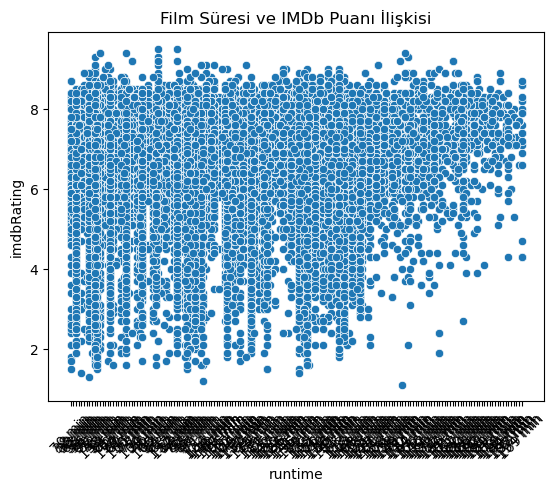

In [88]:
#Film süresi ile imdb puanı ilişkisi
df = df.reset_index(drop=True) 
df_filtered_runtime = df[(df["runtime_minutes"] >= 30) & (df["runtime_minutes"] <= 200)] 
sns.scatterplot(data=df_filtered_runtime, x='runtime', y='imdbRating') 
plt.title('Film Süresi ve IMDb Puanı İlişkisi') 
plt.xticks(rotation=45)
plt.show()

In [81]:
#En çok oy alan 10 film
df_unique = df.drop_duplicates(subset="imdbID")
df_unique.sort_values("imdbVotes", ascending=False).head(10)

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,poster,plot,fullplot,language,country,awards,lastupdated,type,genre_list,runtime_minutes
20794,111161,The Shawshank Redemption,1994,R,142 min,"Crime, Drama",1994-10-14,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,https://m.media-amazon.com/images/M/MV5BODU4Mj...,Two imprisoned men bond over a number of years...,Andy Dufresne is a young and successful banker...,English,USA,Nominated for 7 Oscars. Another 16 wins & 16 n...,2015-09-13 00:42:00.373000000,movie,"[Crime, Drama]",142.0
37006,468569,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",2008-07-18,Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,When the menace known as the Joker wreaks havo...,Batman raises the stakes in his war on crime. ...,English,"USA, UK",Won 2 Oscars. Another 142 wins & 106 nominations.,2015-09-10 17:05:27.667000000,movie,"[Action, Crime, Drama]",152.0
44865,1375666,Inception,2010,PG-13,148 min,"Action, Mystery, Sci-Fi",2010-07-16,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,A thief who steals corporate secrets through u...,"Dom Cobb is a skilled thief, the absolute best...",English,"USA, UK",Won 4 Oscars. Another 158 wins & 172 nominations.,2015-09-12 00:29:01.430000000,movie,"[Action, Mystery, Sci-Fi]",148.0
24362,137523,Fight Club,1999,R,139 min,Drama,1999-10-15,David Fincher,"Chuck Palahniuk (novel), Jim Uhls (screenplay)","Edward Norton, Brad Pitt, Helena Bonham Carter...",...,https://m.media-amazon.com/images/M/MV5BMjIwNT...,"An insomniac office worker, looking for a way ...",A ticking-time-bomb insomniac and a slippery s...,English,"USA, Germany",Nominated for 1 Oscar. Another 10 wins & 22 no...,2015-09-02 00:16:15.833000000,movie,[Drama],139.0
20731,110912,Pulp Fiction,1994,R,154 min,"Crime, Drama",1994-10-14,Quentin Tarantino,"Quentin Tarantino (story), Roger Avary (story)...","Tim Roth, Amanda Plummer, Laura Lovelace, John...",...,https://m.media-amazon.com/images/M/MV5BMjE0OD...,"The lives of two mob hit men, a boxer, a gangs...",Jules Winnfield and Vincent Vega are two hitme...,English,USA,Won 1 Oscar. Another 63 wins & 47 nominations.,2015-08-31 00:09:04.543000000,movie,"[Crime, Drama]",154.0
23532,120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Adventure, Fantasy",2001-12-19,Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Alan Howard, Noel Appleby, Sean Astin, Sala Baker",...,https://m.media-amazon.com/images/M/MV5BNTEyMj...,A meek hobbit of the Shire and eight companion...,An ancient Ring thought lost for centuries has...,English,"New Zealand, USA",Won 4 Oscars. Another 110 wins & 100 nominations.,2015-08-31 00:05:39.967000000,movie,"[Adventure, Fantasy]",178.0
20449,109830,Forrest Gump,1994,PG-13,142 min,"Drama, Romance",1994-07-06,Robert Zemeckis,"Winston Groom (novel), Eric Roth (screenplay)","Tom Hanks, Rebecca Williams, Sally Field, Mich...",...,https://m.media-amazon.com/images/M/MV5BMTQwMT...,"Forrest Gump, while not intelligent, has accid...",Forrest Gump is a simple man with a low I.Q. b...,English,USA,Won 6 Oscars. Another 40 wins & 47 nominations.,2015-08-22 00:15:05.593000000,movie,"[Drama, Romance]",142.0
25596,167260,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Adventure, Fantasy",2003-12-17,Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Noel Appleby, Ali Astin, Sean Astin, David Aston",...,https://m.media-amazon.com/images/M/MV5BMjE4Mj...,Gandalf and Aragorn lead the World of Men agai...,While Frodo & Sam continue to approach Mount D...,English,"USA, New Zealand",Won 11 Oscars. Another 164 wins & 87 nominations.,2015-08-22 00:05:56.687000000,movie,"[Adven

<Axes: xlabel='year'>

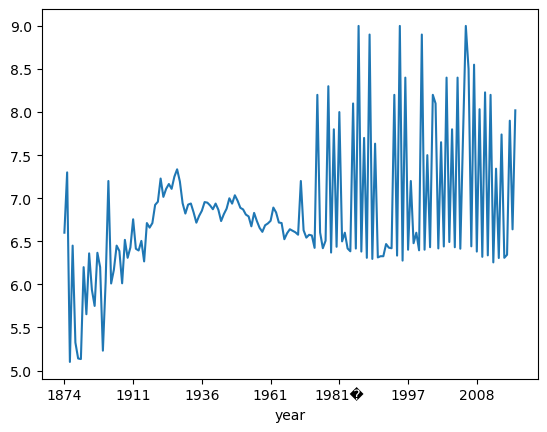

In [82]:
#imdb puanlarının yıllara göre ortalaması
df.groupby("year")["imdbRating"].mean().plot()

In [83]:
#Birden fazla çalıştırınca df bozuluyor
df["cast"] = df["cast"].astype(str).str.split(",")
df_cast = df.explode("cast")
df_cast["cast"] = df_cast["cast"].str.strip()   

actor_ratings = df_cast.groupby("cast")["imdbRating"].mean()


In [84]:
#En az 10 filmi olan, en yüksek ortalama IMDB puanına sahip aktörler
actor_stats = df_cast.groupby("cast")["imdbRating"].agg(["mean", "count"])
actor_stats = actor_stats[actor_stats["count"] > 10]   
actor_stats = actor_stats.sort_values("mean", ascending=False)

actor_stats.head(10)


,mean,count
cast,,
David Attenborough,8.661538,13
Sener Sen,8.518182,11
Kamal Haasan,8.324000,25
Rina Zelyonaya,8.266667,12
Michiyo Aratama,8.264286,14
John Pilger,8.208333,12
Vitali Solomin,8.206250,16
Jacqueline Bassett,8.153846,13
Bruce Balden,8.153846,13


In [85]:
#Film öneri sistemi
df_recom = df.copy()
df_recom = df.fillna("")
cols = ["genre", "director", "cast", "plot"]

for c in cols:
    df_recom[c] = df_recom[c].astype(str)

df_recom["features"] = (
    df_recom["genre"] + " " +
    df_recom["director"] + " " +
    df_recom["cast"] + " " +
    df_recom["plot"]
)

df_small = df_recom.tail(20000).reset_index(drop=True)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_small["features"])

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


indices = pd.Series(df_small.index, index=df_small["title"]).drop_duplicates()

def get_recommendations(title, n=10):
    if title not in indices:
        return f"Film bulunamadı: {title}"

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]

    movie_indices = [i[0] for i in sim_scores]

    return df_small.iloc[movie_indices][["title", "genre", "imdbRating"]]

In [87]:

get_recommendations("The Hacker Wars", 20)


,title,genre,imdbRating
11008,Shockwave Darkside,"Action, Sci-Fi",4.8
12531,Star Wars Uncut: Director's Cut,"Action, Sci-Fi",6.9
18697,Sky Line,Documentary,
15457,On Any Sunday: The Next Chapter,"Documentary, Action, Adventure",6.9
4160,"Merry Christmas, Drake & Josh",Comedy,7.0
9160,Barely Lethal,"Action, Adventure, Comedy",5.3
18788,Cyberbully,"Drama, Mystery, Thriller",7.3
14724,Wolfskinder,"Drama, History",6.6
14725,Wolfskinder,"Drama, History",6.6
14726,Wolfskinder,"Drama, History",6.6
